<a href="https://colab.research.google.com/github/lineality/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/GGA1_1_3v2_LS_DS_113_Making_Data_backed_Assertions_Assignment_Geoffrey_Gordon_Ashbrook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
#library Imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [24]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

#Downloading the data into a local directory / CWD current working directory
!wget https://raw.githubusercontent.com/lineality/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv

#checking to see if it downloaded/uploaded, it did.
!ls

--2019-09-05 20:33:49--  https://raw.githubusercontent.com/lineality/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17574 (17K) [text/plain]
Saving to: ‘persons.csv.2’

persons.csv.2       100%[===================>]  17.16K  --.-KB/s    in 0.007s  

2019-09-05 20:33:49 (2.42 MB/s) - ‘persons.csv.2’ saved [17574/17574]

LoanStats_2018Q4.csv	    LoanStats_2018Q4.csv.zip.3	persons.csv.2
LoanStats_2018Q4.csv.zip    LoanStats_2018Q4.csv.zip.4	sample_data
LoanStats_2018Q4.csv.zip.1  persons.csv
LoanStats_2018Q4.csv.zip.2  persons.csv.1


In [25]:

df = pd.read_csv('persons.csv')
#df2 = pd.read_csv('adult.data')


#so full head displays
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
#print (train.head())
print (df.head())
print (df.describe())
print (df.shape)
#df.dtype

#check for missing values
#data_set.isna()

print(df.isna().sum())
print(df.count())




   Unnamed: 0  age  weight  exercise_time
0           0   44     118            192
1           1   41     161             35
2           2   46     128            220
3           3   39     216             57
4           4   28     116            182
        Unnamed: 0          age       weight  exercise_time
count  1200.000000  1200.000000  1200.000000    1200.000000
mean    599.500000    48.396667   153.540833     134.910833
std     346.554469    18.166802    35.132182      85.548895
min       0.000000    18.000000   100.000000       0.000000
25%     299.750000    33.000000   125.000000      65.000000
50%     599.500000    48.000000   149.000000     122.000000
75%     899.250000    64.000000   180.250000     206.000000
max    1199.000000    80.000000   246.000000     300.000000
(1200, 4)
Unnamed: 0       0
age              0
weight           0
exercise_time    0
dtype: int64
Unnamed: 0       1200
age              1200
weight           1200
exercise_time    1200
dtype: int64


In [0]:
#No problems with NAN missing data

###Here are some exploratory graphs to see if we can use visual forms to gain insight into to relationship between Age, Weight, and Exersize, in particular for Weight as Y (looking for the 'cause' of Y or best correlation) which is the main X and which is a confounding X (not main X, not main relationship).

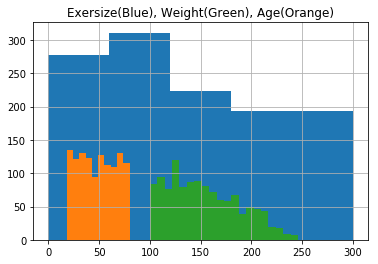

In [37]:
#Graphs
# Let take some basic first looks at the 'shape' of the data

#Histogram 
plot0 = df['exercise_time'].hist(bins=5);
plot0.set_title('Exersize(Blue), Weight(Green), Age(Orange)')
df['age'].hist(bins=10);
df['weight'].hist(bins=20);





(above) While the sets are not standardized here, they are arranged to all appear in the same figure, and in some ways this shows a great deal of information in terms of the overall trends. By coicidence all the graphs have at least a slight downward slope, yet the age is mostly random. The closest correlation are the steeper slopes. 

As the question is Main X and non-main-X or Confounding-X, Age would be the confounding-X whether Y was weight or exersize.


Text(0.5, 1.0, 'Exercise Time By number of People')

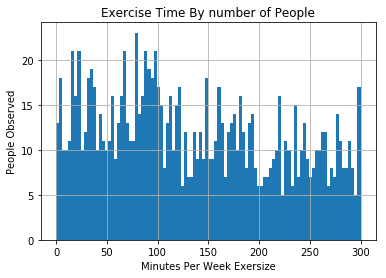

In [34]:
#Histogram 
plot1 = df['exercise_time'].hist(bins=100);
plot1.set_ylabel('People Observed')
plot1.set_xlabel('Minutes Per Week Exersize')
plot1.set_title('Exercise Time By number of People')




This shows in more detail the same trend as described above.

Text(0.5, 1.0, 'Age By number of People')

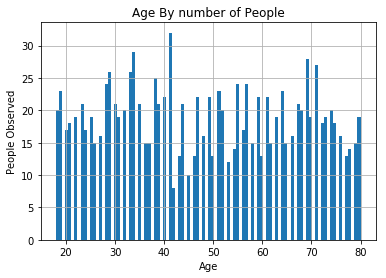

In [39]:
#Histogram 
plotA = df['age'].hist(bins=100);
plotA.set_ylabel('People Observed')
plotA.set_xlabel('Age')
plotA.set_title('Age By number of People')


This shows in more detail the same trend as described above.

Text(0.5, 1.0, 'Weight By number of People')

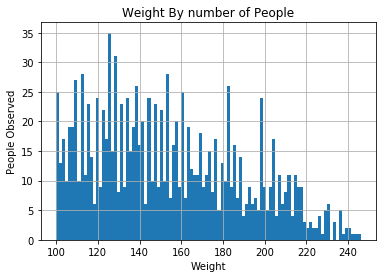

In [44]:
#Histogram 

plotw = df['weight'].hist(bins=100)
plotw.set_ylabel('People Observed')
plotw.set_xlabel('Weight')
plotw.set_title('Weight By number of People')


This shows in more detail the same trend as described above.)

Text(0.5, 1.0, 'Age and Weight(Y)')

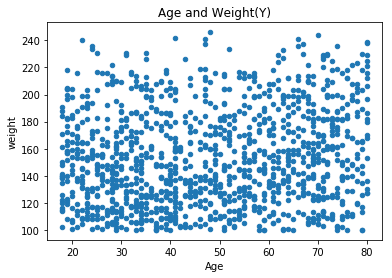

In [43]:

#Scatterplot
plotaw = df.plot.scatter('age', 'weight');
plotaw.set_ylabel('weight')
plotaw.set_xlabel('Age')
plotaw.set_title('Age and Weight(Y)')
    

This graph is imporantly highly random. As 'Weight' is our intended Y, age is a useless predictor of weight.

Text(0.5, 1.0, 'Age and exercise_time')

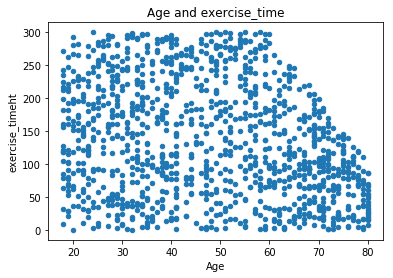

In [50]:
#Scatterplot
plotae = df.plot.scatter('age', 'exercise_time');
plotae.set_ylabel('exercise_timeht')
plotae.set_xlabel('Age')
plotae.set_title('Age and exercise_time')


Here age and exercise show a slight pattern, which may be a kind of 'smoking gun' for how the three areas (age, weight, exersize) relate. There is no strong relationship between age and exersize time - so that it is not ambiguous which is the better model for a cause for, or which is the stronger correlation with, weight. 

Text(0.5, 1.0, 'weight and exercise_time')

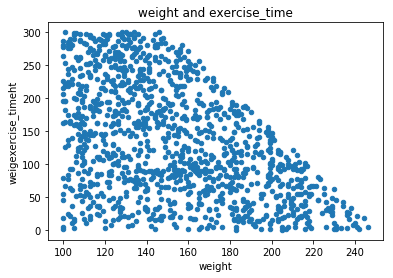

In [49]:
#Scatterplot
plotwe = df.plot.scatter('weight', 'exercise_time');
plotwe.set_ylabel('weigexercise_timeht')
plotwe.set_xlabel('weight')
plotwe.set_title('weight and exercise_time')

Of all the graphs, the most clear pattern, the non-confounding X, the real X for the Y of weight, is clearly exersize time.

Text(0.5, 1.0, 'density plot of Weight')

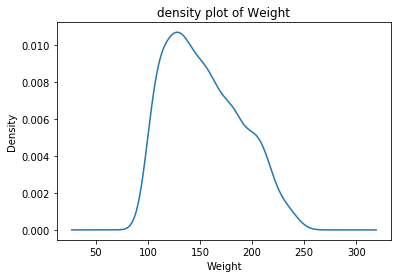

In [69]:

#Density Plot
plotdw = df['weight'].plot.density();
plotdw.set_xlabel('Weight')
plotdw.set_title('density plot of Weight')


This shows in more detail the same trend as described above. In some ways the overall shape is more clearly shown here.

Text(0.5, 1.0, 'density plot of Exercise Time')

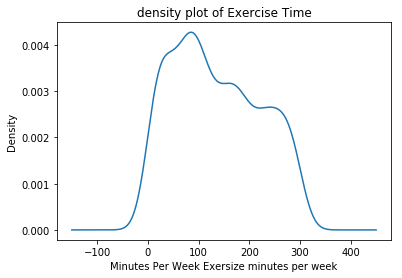

In [74]:

#Density Plot
plotd11 = df['exercise_time'].plot.density();
plotd11.set_xlabel('Minutes Per Week Exersize minutes per week')
plotd11.set_title('density plot of Exercise Time')

This shows in more detail the same trend as described above. This shows in more detail the same trend as described above. In some ways the overall shape is more clearly shown here.

Text(0.5, 1.0, 'density plot of age')

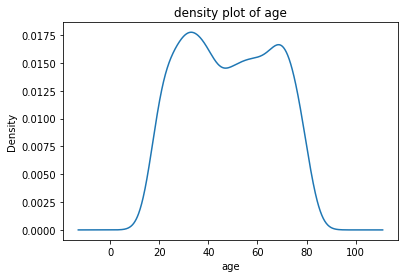

In [72]:
#Density Plot
plot111 = df['age'].plot.density();
plot111.set_xlabel('age')
plot111.set_title('density plot of age')



This shows in more detail the same trend as described above. This shows in more detail the same trend as described above. In some ways the overall shape is more clearly shown here.

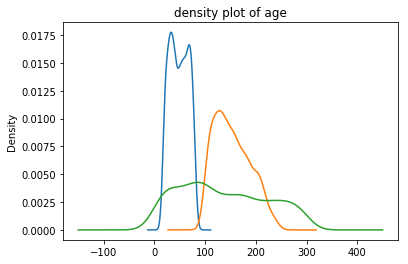

In [73]:
#Density Plot
df['age'].plot.density();
#Density Plot
plotww = df['weight'].plot.density();
plotww.set_title('density plot of age, weight, and exersize-time')
#Density Plot
df['exercise_time'].plot.density();

With with the three-in-one histogram, this shows the overall shape of each, but not to a given scale. This shows in more detail the same trend as described above. In some ways the overall shape is more clearly shown here.

In [0]:
#failed attempts to standardize the data to see how that looks


# The above graph looks like it should be standardized/normalized

#import pandas as pd
#from sklearn import preprocessing

#x = df.values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#df = pd.DataFrame(x_scaled)

In [0]:
#Density Plot
#df['age'].plot.density();
#Density Plot
#df['weight'].plot.density();
#Density Plot
#df['exercise_time'].plot.density();

#df.head()

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


1. What kinds of variables are these:all: int64, ordinal
age, weight: continuous
exersize: discrete
(ordinal, catagorical, continuous, discrete)

2.- age
- exercise
- weight

- age seems independent or irrelevant
- with the best relationship being between exercise and weight
e..g weight and age appears completely random, suggesting age does not influence weight but exercise does. 

I don't think age is confounding as it does not bias the results.

3. Real and spurious:
The relationship between weight and exercise appears real
while the relationship between age and excersize is likely spurious - weak with without a clear causal relationship. 

But is there a smoking gun in terms of a quantifiable statistical test? ...probably? But what is it?




One question, which may or may not be important, is:
What is the best not the faciest way to get to the point of the question?
Sometimes a fancier graph shows more, but in this case, would it? 
I'm still not 100% clear on what pattern we are supposed to see, and looking over many different graphs I'm not sure I have seen a visualization of what that pattern is. 

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)

Text(0.5, 1.0, 'Age and exercise_time')

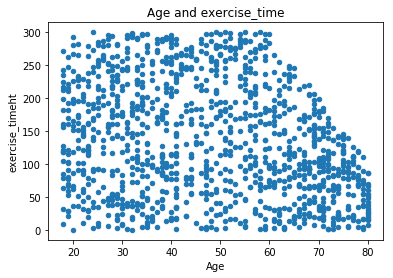

In [77]:
#Scatterplot
plotae = df.plot.scatter('age', 'exercise_time');
plotae.set_ylabel('exercise_timeht')
plotae.set_xlabel('Age')
plotae.set_title('Age and exercise_time')



I hypothosize that this is a spurious connection, or at least requires more context.

Blog Posts

https://medium.com/@GeoffreyGordonAshbrook/spurious-connections-1f610bbebc25
  Blog post on blog: Wooden Information
    
    
    Or rather...
https://medium.com/wooden-information/spurious-connections-eb32d7c88eb2
      

In [0]:
#attempted linear regressions but could not get anything to work or help from TL

Not content with insights from visuals, I am pulled towards

In [76]:
# alas this did not work and I ran out of time, but I'm curious how various statistical tests would show aspects of the relationship...
#https://www.geeksforgeeks.org/python-pandas-dataframe-corr/


# To find the correlation among 
# the columns using pearson method 
#df.pd.corr(method ='pearson') 
df = pd.read_csv('persons.csv')
# importing pandas as pd 
#import pandas as pd 
  
# Making data frame from the csv file 
#df = pd.read_csv("nba.csv") 
  
# To find the correlation among 
# the columns using kendall method 
df.corr(method ='kendall') 

df.corr(method ='pearson') 




,Unnamed: 0,age,weight,exercise_time
Unnamed: 0,1.000000,-0.000418,-0.060297,-0.020138
age,-0.000418,1.000000,0.144168,-0.273818
weight,-0.060297,0.144168,1.000000,-0.478021
exercise_time,-0.020138,-0.273818,-0.478021,1.000000
